### Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters. 
### Draw the inferences from the clusters obtained.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [2]:
ewa = pd.read_csv("EastWestAirlines.csv")

#### EDA on dataset

In [3]:
ewa.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
ewa.tail(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [5]:
# Check for data types, non-null values & memory usage
ewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
# Get central tendency, dispersion and shape of dataset’s distribution
ewa.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
# Checking Null values
ewa.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [8]:
# Check for the column labels of the DataFrame
ewa.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [9]:
# Check the dimensions of the DataFrame
ewa.shape

(3999, 12)

In [10]:
# Check for the random sample from the DataFrame
ewa.sample(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
2985,3007,132894,0,4,1,1,34540,15,0,0,3106,0
2831,2853,69884,0,5,1,1,89360,24,450,2,1990,1
1629,1645,49777,2360,3,1,1,12241,12,0,0,4777,0
2786,2808,18959,0,1,1,1,0,0,0,0,2115,0
931,942,17336,0,1,1,1,2375,12,0,0,5934,0


In [11]:
#standardize the data to normal distribution
from sklearn import preprocessing
ewa_standardized = preprocessing.scale(ewa)

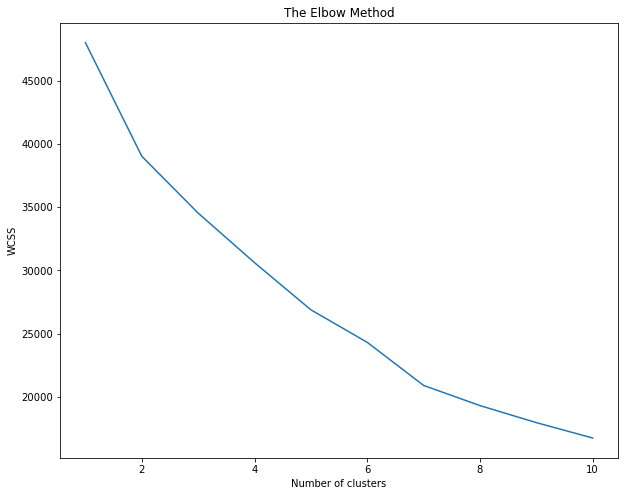

In [12]:
# find the appropriate cluster number
from sklearn.cluster import KMeans

plt.figure(figsize=(10, 8))
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(ewa_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(ewa_standardized)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
ewa['cluster'] = cluster

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(ewa.groupby('cluster').mean(),1))
kmeans_mean_cluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
1,3136.6,39509.5,103.6,1.4,1.0,1.0,6108.7,7.7,197.2,0.6,2145.9,0.2
2,1751.3,194803.9,810.4,2.2,1.0,1.0,32475.4,27.7,5510.7,16.2,4681.4,0.8
3,1095.3,57027.7,97.4,1.4,1.0,1.0,5834.0,8.0,229.4,0.7,5712.6,0.2
4,1664.9,138061.4,78.8,3.5,1.0,4.1,93927.9,28.1,506.7,1.6,4613.9,0.5
5,1551.8,125831.0,162.6,3.9,1.0,1.0,44400.1,19.3,369.8,1.1,4948.5,0.7


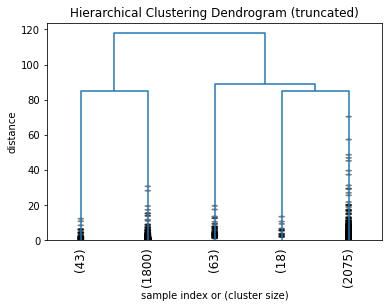

In [14]:
# Hierarchical clustering for the same dataset

# Import required libraries
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision = 5, suppress = True)  # suppress scientific float notation

#creating the linkage matrix
H_cluster = linkage(ewa_standardized, 'ward')

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

dendrogram(
    H_cluster,
    truncate_mode = 'lastp',  # show only the last p merged clusters
    p = 5,  # show only the last p merged clusters
    leaf_rotation = 90.,
    leaf_font_size = 12.,
    show_contracted = True,  # to get a distribution impression in truncated branches
)

plt.show()

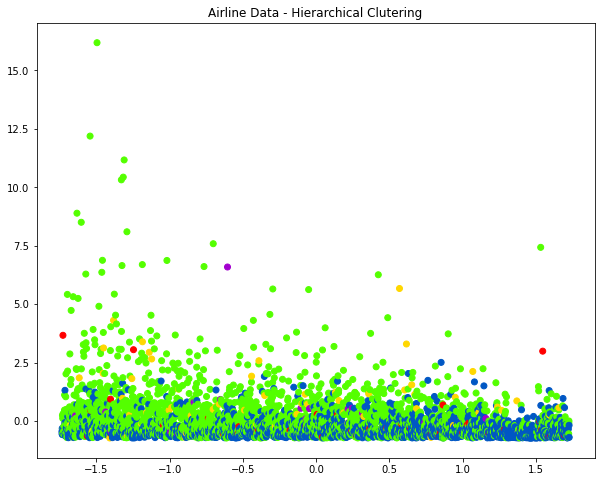

In [15]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
from scipy.cluster.hierarchy import fcluster

k = 5
cluster_2 = fcluster(H_cluster, k, criterion = 'maxclust')
cluster_2[0:30:, ]
plt.figure(figsize = (10, 8))

ewa_standardized_2 = pd.DataFrame(ewa_standardized)

# plot points with cluster dependent colors
plt.scatter(ewa_standardized_2.iloc[:, 0], ewa_standardized_2.iloc[:, 1], c = cluster_2, cmap = 'prism')
plt.title('Airline Data - Hierarchical Clutering')
plt.show()

In [16]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)

# Adding the hierarchical clustering to dataset
ewa2 = ewa
ewa2['cluster'] = cluster_Hierarchical.values.astype(int)
ewa2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5
